# Importing the Dataset

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('Flight_price.csv',error_bad_lines=False,delimiter='\t')
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,Air Asia,22-10-2021,New Delhi,Mumbai,08:00,14:35,6h 35m,1 Stop,"5,953"
1,Air Asia,22-10-2021,New Delhi,Mumbai,12:40,20:15,7h 35m,1 Stop,"5,953"
2,Air Asia,22-10-2021,New Delhi,Mumbai,11:55,20:15,8h 20m,1 Stop,"5,953"
3,Air Asia,22-10-2021,New Delhi,Mumbai,08:00,16:35,8h 35m,1 Stop,"5,953"
4,Air Asia,22-10-2021,New Delhi,Mumbai,04:55,14:15,9h 20m,1 Stop,"5,953"
...,...,...,...,...,...,...,...,...,...
1614,Air India,03-11-2021,New Delhi,Mumbai,10:15,15:40,5h 25m,1 Stop,"14,040"
1615,Vistara,03-11-2021,New Delhi,Mumbai,11:10,14:45 2021-11-04,27h 35m,1 Stop,"15,038"
1616,Go First,03-11-2021,New Delhi,Mumbai,11:30,17:00,5h 30m,1 Stop,"15,405"
1617,Go First,03-11-2021,New Delhi,Mumbai,10:45,17:00,6h 15m,1 Stop,"15,405"


1.Since data is in form of excel file we have to use pandas read_excel to load the data.

2.After loading it is important to check the complete information of data as it can indication many of the hidden infomation such as null values in a column or a row.

3.Check whether any null values are there or not. if it is present then following can be done.

4.Describe data --> which can give statistical analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1619 entries, 0 to 1618
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          1619 non-null   object
 1   Date_of_Journey  1619 non-null   object
 2   Source           1619 non-null   object
 3   Destination      1619 non-null   object
 4   Dep_Time         1619 non-null   object
 5   Arrival_Time     1619 non-null   object
 6   Duration         1619 non-null   object
 7   Total_Stops      1619 non-null   object
 8   Price            1619 non-null   object
dtypes: object(9)
memory usage: 114.0+ KB


In [6]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Dep_Time',
       'Arrival_Time', 'Duration', 'Total_Stops', 'Price'],
      dtype='object')

In [7]:
df['Duration'].value_counts()

2h 10m     167
2h 15m     116
2h 05m      98
2h 20m      64
2h 00m      33
          ... 
18h 05m      1
25h 40m      1
15h 15m      1
21h 20m      1
6h 05m       1
Name: Duration, Length: 198, dtype: int64

In [8]:
df.shape

(1619, 9)

# Missing Values

In [9]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64

# Statistical Analysis

In [10]:
df.describe()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
count,1619,1619,1619,1619,1619,1619,1619,1619,1619
unique,6,11,1,1,150,335,198,4,218
top,Vistara,01-11-2021,New Delhi,Mumbai,08:10,23:00,2h 10m,1 Stop,"5,955"
freq,459,166,1619,1619,64,45,167,1086,406


# DataFrame Description

The objective of this article is to predict flight prices given the various parameters. Data used in this article is scraped from Yatra.com.
We have the dataset with prices of flight tickets for various airlines and between various cities. We have the features like name of the airline,source from which the service begins,destination where the service ends,route taken by the flight to reach the destination, time when the journey starts from the source,time of arrival at the destination, total duration of the flight,total stops between the source and destination. The price of the ticket is given for the paticular airlines and we have to predict the price of the flight as the target variable.
 
This will be a regression problem since the target or dependent variable is the price (continuous numeric value).

Airline: Name of the airline used for traveling

Date_of_Journey: Date at which a person travelled

Source: Starting location of flight

Destination: Ending location of flight

Dep_Time: Departure time of flight from starting location

Arrival_Time: Arrival time of flight at destination

Duration: Duration of flight in hours/minutes

Total_Stops: Number of total stops flight took before landing at the destination.

Price: Price of the flight

Few observations about some of the variables:

1. ‘Price‘ will be our dependent variable and all remaining variables can be used as independent variables.

2. ‘Total_Stops‘ can be used to determine if the flight was direct or connecting.

# Exploratory Data Analysis

From description we can see that Date_of_Journey is a object data type, Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

For this we require pandas to_datetime to convert object data type to datetime dtype.

**.dt.day method will extract only day of that date**\ **.dt.month method will extract only month of that date**

We have  the date of journey with usual date format,we have to extract the format as day and month. Extracting date and month from data of journey and we will drop the Journey day .

In [11]:
df['Journey_day']=pd.to_datetime(df.Date_of_Journey,format='%d-%m-%Y').dt.day

In [12]:
df['Journey_month']=pd.to_datetime(df['Date_of_Journey'],format='%d-%m-%Y').dt.month

In [13]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month
0,Air Asia,22-10-2021,New Delhi,Mumbai,08:00,14:35,6h 35m,1 Stop,"5,953",22,10
1,Air Asia,22-10-2021,New Delhi,Mumbai,12:40,20:15,7h 35m,1 Stop,"5,953",22,10
2,Air Asia,22-10-2021,New Delhi,Mumbai,11:55,20:15,8h 20m,1 Stop,"5,953",22,10
3,Air Asia,22-10-2021,New Delhi,Mumbai,08:00,16:35,8h 35m,1 Stop,"5,953",22,10
4,Air Asia,22-10-2021,New Delhi,Mumbai,04:55,14:15,9h 20m,1 Stop,"5,953",22,10


we are dropping Date_of_Journey since we have converted them into Journey_day and Journey_month.

In [14]:
df.drop(['Date_of_Journey'],axis=1,inplace=True)

Similarly, we can extract ‘Departure_Hour’ and ‘Departure_Minute’ as well as ‘Arrival_Hour and ‘Arrival_Minute’ from ‘Dep_Time’ and ‘Arrival_Time’ variables respectivel
We can extract the flight departure time in hours and minutes from the Departure time.

In [15]:
# Extracting Hours
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

# Extracting Minutes
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

#Dropping the Dep_Time since we have taken in min and hours.
df.drop(["Dep_Time"], axis = 1, inplace = True)

In [16]:
df.head()

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,Air Asia,New Delhi,Mumbai,14:35,6h 35m,1 Stop,"5,953",22,10,8,0
1,Air Asia,New Delhi,Mumbai,20:15,7h 35m,1 Stop,"5,953",22,10,12,40
2,Air Asia,New Delhi,Mumbai,20:15,8h 20m,1 Stop,"5,953",22,10,11,55
3,Air Asia,New Delhi,Mumbai,16:35,8h 35m,1 Stop,"5,953",22,10,8,0
4,Air Asia,New Delhi,Mumbai,14:15,9h 20m,1 Stop,"5,953",22,10,4,55


In [17]:
#Getting arrival minutes and hours from Arrival time.

#In hours
df['Arrival_hour']=pd.to_datetime(df.Arrival_Time).dt.hour
#In minutes
df['Arrival_min']=pd.to_datetime(df.Arrival_Time).dt.minute



In [18]:
df

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Air Asia,New Delhi,Mumbai,14:35,6h 35m,1 Stop,"5,953",22,10,8,0,14,35
1,Air Asia,New Delhi,Mumbai,20:15,7h 35m,1 Stop,"5,953",22,10,12,40,20,15
2,Air Asia,New Delhi,Mumbai,20:15,8h 20m,1 Stop,"5,953",22,10,11,55,20,15
3,Air Asia,New Delhi,Mumbai,16:35,8h 35m,1 Stop,"5,953",22,10,8,0,16,35
4,Air Asia,New Delhi,Mumbai,14:15,9h 20m,1 Stop,"5,953",22,10,4,55,14,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1614,Air India,New Delhi,Mumbai,15:40,5h 25m,1 Stop,"14,040",3,11,10,15,15,40
1615,Vistara,New Delhi,Mumbai,14:45 2021-11-04,27h 35m,1 Stop,"15,038",3,11,11,10,14,45
1616,Go First,New Delhi,Mumbai,17:00,5h 30m,1 Stop,"15,405",3,11,11,30,17,0
1617,Go First,New Delhi,Mumbai,17:00,6h 15m,1 Stop,"15,405",3,11,10,45,17,0


we are dropping Arrival_Time since we have converted them as Arrival_hour,and Arrival_min.

In [19]:
df.drop(['Arrival_Time'],axis=1,inplace=True)

In [20]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Air Asia,New Delhi,Mumbai,6h 35m,1 Stop,"5,953",22,10,8,0,14,35
1,Air Asia,New Delhi,Mumbai,7h 35m,1 Stop,"5,953",22,10,12,40,20,15
2,Air Asia,New Delhi,Mumbai,8h 20m,1 Stop,"5,953",22,10,11,55,20,15
3,Air Asia,New Delhi,Mumbai,8h 35m,1 Stop,"5,953",22,10,8,0,16,35
4,Air Asia,New Delhi,Mumbai,9h 20m,1 Stop,"5,953",22,10,4,55,14,15


# Data Preprocessing

We also have duration information on the ‘Duration’ variable. This variable contains both duration hours and minutes information combined.
We can extract ‘Duration_hours’ and ‘Duration_minutes’ separately from the ‘Duration’ variable.
similarly we are splitting Duration and extracting as hours and minutes separately. so we are grouping duration column as list.duration is the time taken by the plane to reach the destination.duration is the difference between the arrival time and departure time.

In [21]:
len("2h 50m".split())

2

In [22]:
duration=list(df['Duration'])
l=[]
for i in range(len(duration)):
    x=duration[i]
    if len(duration[i].split())!=2: #checking for duration is on hours or minutes
        if(x[-1]=="m") :
            l.append(int(x[:-1]))
        else:
            l.append(int(duration[i][:1])*60)
    else:
 #            print(duration[i])           
             a = duration[i].split()
 #            print(a[1][:-1])   
 #            print(int(a[1][:-1]))
             l.append(int(a[0][:-1])*60+int(a[1][:-1])) 
            
            

#adding duration_hours,duration_mins to df.

In [23]:
lh=[]
lm=[]
for x in l :
    lh.append(x//60)
    lm.append(x%60)
    

In [24]:
df['Duration_hours'] = lh
df['Duration_mins'] = lm

In [25]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Air Asia,New Delhi,Mumbai,6h 35m,1 Stop,"5,953",22,10,8,0,14,35,6,35
1,Air Asia,New Delhi,Mumbai,7h 35m,1 Stop,"5,953",22,10,12,40,20,15,7,35
2,Air Asia,New Delhi,Mumbai,8h 20m,1 Stop,"5,953",22,10,11,55,20,15,8,20
3,Air Asia,New Delhi,Mumbai,8h 35m,1 Stop,"5,953",22,10,8,0,16,35,8,35
4,Air Asia,New Delhi,Mumbai,9h 20m,1 Stop,"5,953",22,10,4,55,14,15,9,20


In [26]:
df.drop(['Duration'],axis=1,inplace=True)

In [27]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Air Asia,New Delhi,Mumbai,1 Stop,"5,953",22,10,8,0,14,35,6,35
1,Air Asia,New Delhi,Mumbai,1 Stop,"5,953",22,10,12,40,20,15,7,35
2,Air Asia,New Delhi,Mumbai,1 Stop,"5,953",22,10,11,55,20,15,8,20
3,Air Asia,New Delhi,Mumbai,1 Stop,"5,953",22,10,8,0,16,35,8,35
4,Air Asia,New Delhi,Mumbai,1 Stop,"5,953",22,10,4,55,14,15,9,20


# Handling Categorical Data

One can find many ways to handle categorical data. Some of them categorical data are,

**Nominal data** --> data are not in any order --> **OneHotEncoder** is used in this case,

**Ordinal data** --> data are in order --> **LabelEncoder** is used in this case.

Airline, Source, Destination, Total_Stops,are the categorical variables we have in our data. Let’s handle each one by one.

# Categorical Values

In [28]:
df['Airline'].value_counts()

Vistara      459
IndiGo       383
Air India    331
Go First     247
Air Asia     115
SpiceJet      84
Name: Airline, dtype: int64

In [29]:
df['Price']=df['Price'].str.replace("," , "").astype('float')

<AxesSubplot:xlabel='Airline', ylabel='Price'>

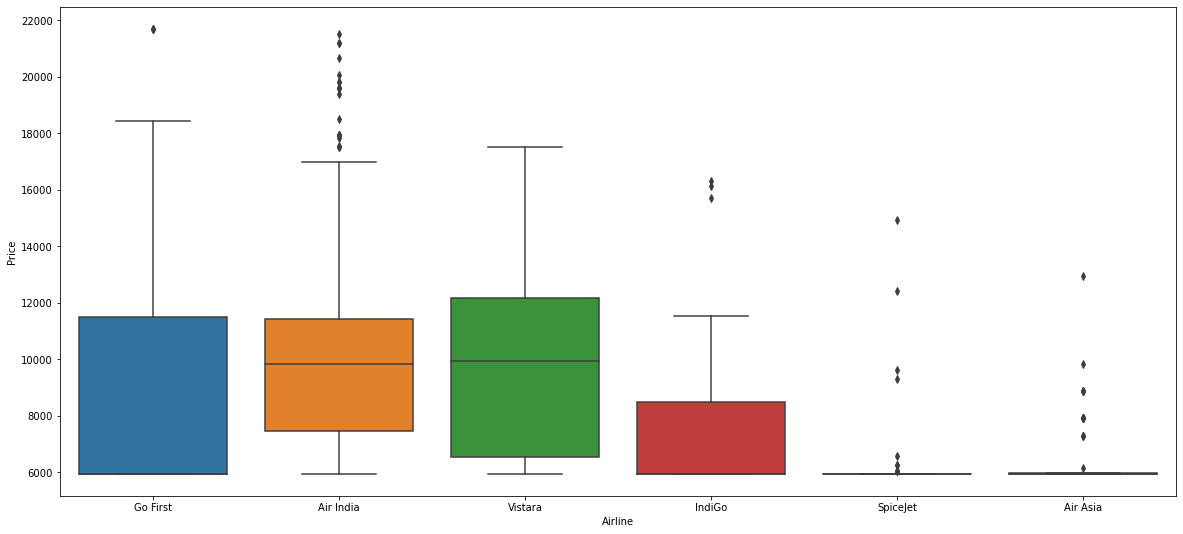

In [30]:
# jet airways business is having more range of difference compared to other airlines.

#Airline vs Price
fig = plt.figure(figsize =(20, 9))

sns.boxplot(y='Price',x='Airline',data=df.sort_values('Price',ascending=False))


As we can see the name of the airline matters. ‘Vistara’ has the highest price range. Other airlines price also varies.

Since the Airline variable is Nominal Categorical Data (There is no order of any kind in airline names) we will use one-hot encoding to handle this variable.

<AxesSubplot:xlabel='Journey_day', ylabel='Price'>

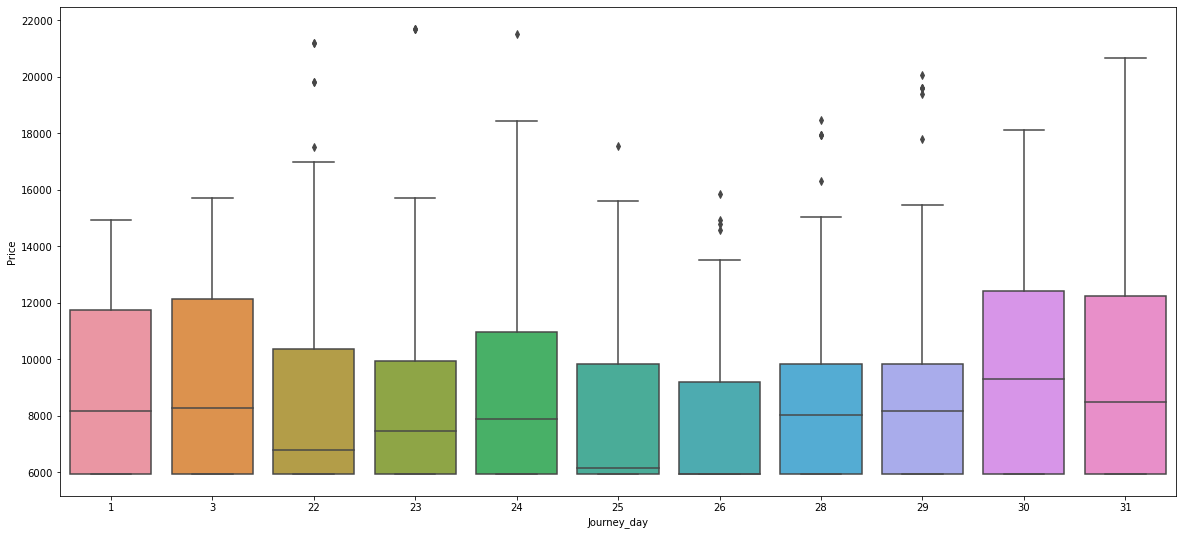

In [31]:
# jet airways business is having more range of difference compared to other airlines.

#Airline vs Price
fig = plt.figure(figsize =(20,9))

sns.boxplot(x='Journey_day',y='Price',data=df.sort_values('Price',ascending=False))

In [32]:
#Since airline is categorical data we will perform onehot encoding
Airline=df[['Airline']]
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_Go First,Airline_IndiGo,Airline_SpiceJet,Airline_Vistara
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


One-Hot encoded ‘Airline’ data is saved in the Airline variable as shown in the above code.

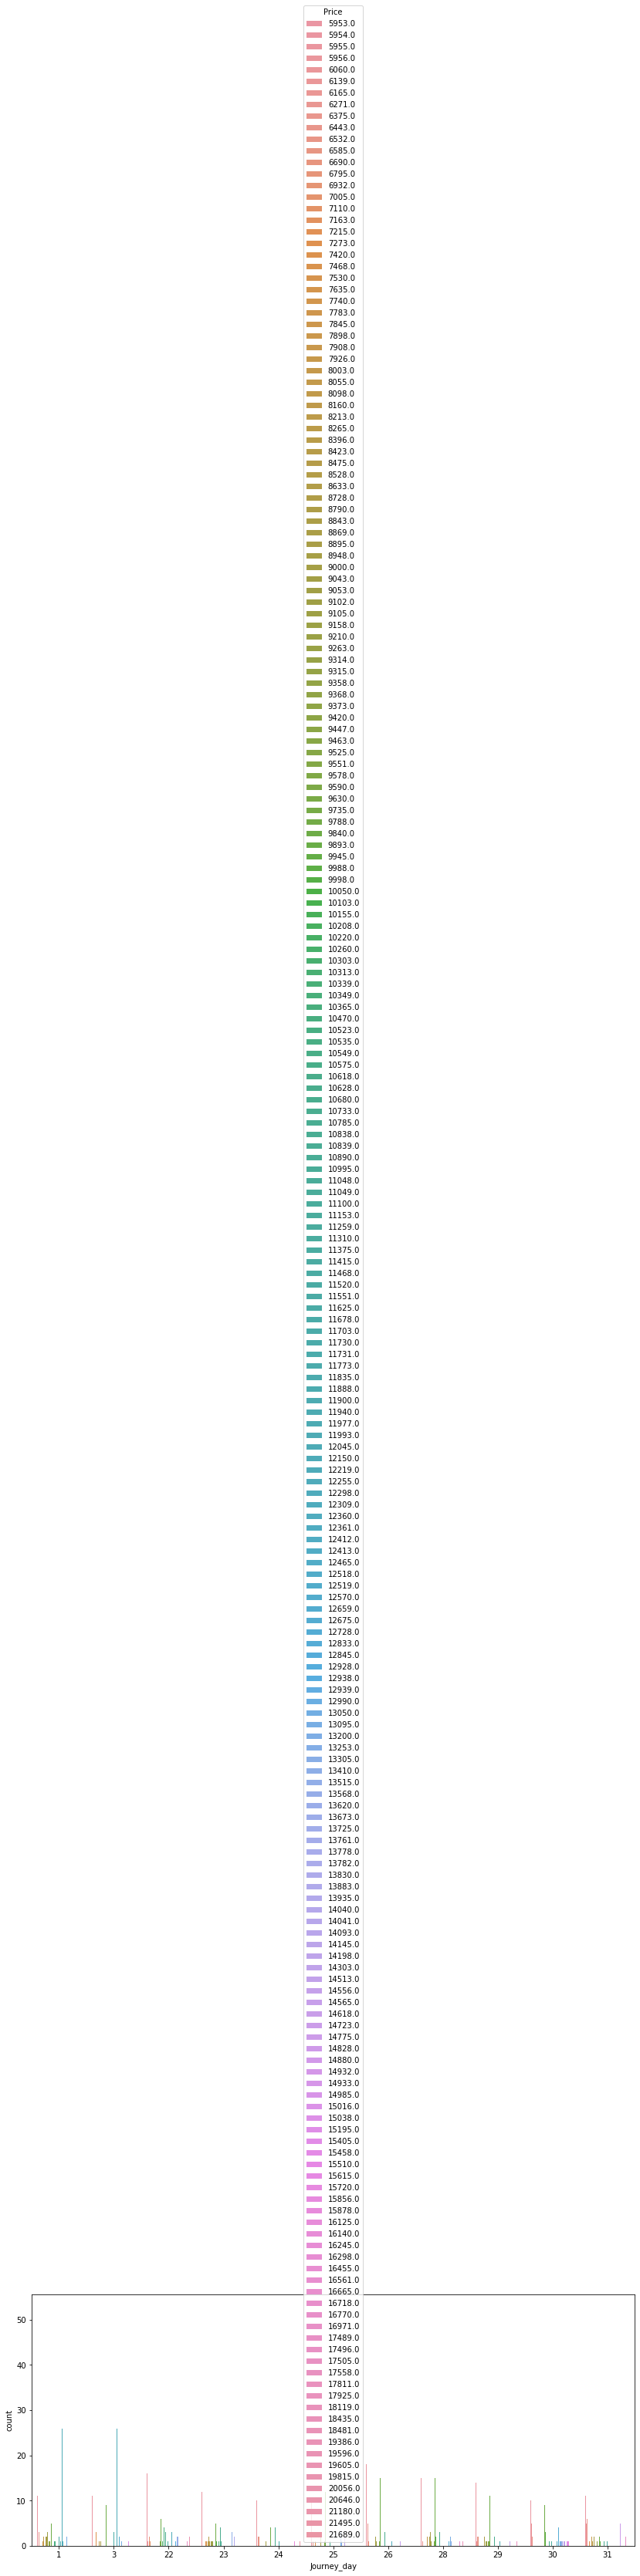

In [33]:
plt.subplots(figsize=(14,6))
sns.countplot(hue='Price',x='Journey_day',data=df)
plt.show()

In [34]:
df['Source'].value_counts()

New Delhi    1619
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='Price'>

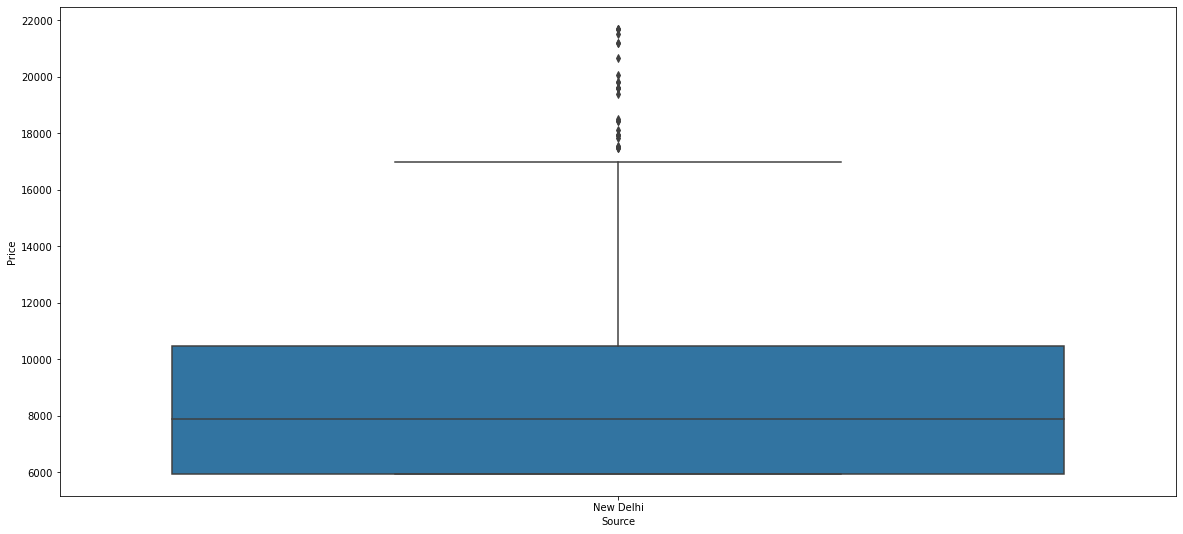

In [35]:
#Source Vs Price
fig = plt.figure(figsize =(20, 9))

sns.boxplot(y='Price',x='Source',data=df.sort_values('Price',ascending=False))

Source  and Destination Variable

Again ‘Source’ and ‘Destination’ variables are Nominal Categorical Data. We will use One-Hot encoding again to handle these two variables.

In [36]:
#source is nominal category we shall do one hot encoding
Source =df[['Source']]
Source=pd.get_dummies(Source)
Source.head()

,Source_New Delhi
0,1
1,1
2,1
3,1
4,1


In [37]:
df['Destination'].value_counts()

Mumbai    1619
Name: Destination, dtype: int64

In [38]:
#As destination is categorical data we will perform one hot encoding
Destination=df[["Destination"]]
Destination=pd.get_dummies(Destination)
Destination.head()

,Destination_Mumbai
0,1
1,1
2,1
3,1
4,1


Here, non-stop means 0 stops which means direct flight. Similarly meaning other values is obvious. We can see it is an Ordinal Categorical Data so we will use LabelEncoder here to handle this variable.

In [39]:
df['Total_Stops'].value_counts()

1 Stop       1086
Non-stop      502
2 Stop(s)      29
3 Stop(s)       2
Name: Total_Stops, dtype: int64

In [40]:
#Since this is  ordinal categorical type we perform label encoder 
#we are assigning values accordingly to the keys.
df.replace({'Non-stop':0,'1 Stop':1,'2 Stop(s)':2,'3 Stop(s)':3,'4 Stop(s)':4},inplace=True)

In [41]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Air Asia,New Delhi,Mumbai,1,5953.0,22,10,8,0,14,35,6,35
1,Air Asia,New Delhi,Mumbai,1,5953.0,22,10,12,40,20,15,7,35
2,Air Asia,New Delhi,Mumbai,1,5953.0,22,10,11,55,20,15,8,20
3,Air Asia,New Delhi,Mumbai,1,5953.0,22,10,8,0,16,35,8,35
4,Air Asia,New Delhi,Mumbai,1,5953.0,22,10,4,55,14,15,9,20


In [42]:
df.dtypes

Airline            object
Source             object
Destination        object
Total_Stops         int64
Price             float64
Journey_day         int64
Journey_month       int64
Dep_hour            int64
Dep_min             int64
Arrival_hour        int64
Arrival_min         int64
Duration_hours      int64
Duration_mins       int64
dtype: object

# Final Dataframe


Now we will create the final dataframe by concatenating all the One-hot and Label-encoded features to the original dataframe. We will also remove original variables using which we have prepared new encoded variables

In [43]:
# we are grouping to  dataframe the columns Airline,Source,Destination
df=pd.concat([df,Airline,Source,Destination],axis=1)

In [44]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_Go First,Airline_IndiGo,Airline_SpiceJet,Airline_Vistara,Source_New Delhi,Destination_Mumbai
0,Air Asia,New Delhi,Mumbai,1,5953.0,22,10,8,0,14,35,6,35,0,0,0,0,0,1,1
1,Air Asia,New Delhi,Mumbai,1,5953.0,22,10,12,40,20,15,7,35,0,0,0,0,0,1,1
2,Air Asia,New Delhi,Mumbai,1,5953.0,22,10,11,55,20,15,8,20,0,0,0,0,0,1,1
3,Air Asia,New Delhi,Mumbai,1,5953.0,22,10,8,0,16,35,8,35,0,0,0,0,0,1,1
4,Air Asia,New Delhi,Mumbai,1,5953.0,22,10,4,55,14,15,9,20,0,0,0,0,0,1,1


In [45]:
df.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [46]:
df.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_Go First,Airline_IndiGo,Airline_SpiceJet,Airline_Vistara,Source_New Delhi,Destination_Mumbai
0,1,5953.0,22,10,8,0,14,35,6,35,0,0,0,0,0,1,1
1,1,5953.0,22,10,12,40,20,15,7,35,0,0,0,0,0,1,1
2,1,5953.0,22,10,11,55,20,15,8,20,0,0,0,0,0,1,1
3,1,5953.0,22,10,8,0,16,35,8,35,0,0,0,0,0,1,1
4,1,5953.0,22,10,4,55,14,15,9,20,0,0,0,0,0,1,1


Let’s see the number of final variables we have in dataframe.

In [47]:
df.shape

(1619, 17)

In [48]:
df.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_Go First',
       'Airline_IndiGo', 'Airline_SpiceJet', 'Airline_Vistara',
       'Source_New Delhi', 'Destination_Mumbai'],
      dtype='object')

# Feature Selection

Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

**heatmap**

**feature_importance_**

**SelectKBest**

In [49]:
x=df.iloc[0:,2:]

In [50]:
x=df.drop(['Price'],axis=1)

In [51]:
x.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_Go First,Airline_IndiGo,Airline_SpiceJet,Airline_Vistara,Source_New Delhi,Destination_Mumbai
0,1,22,10,8,0,14,35,6,35,0,0,0,0,0,1,1
1,1,22,10,12,40,20,15,7,35,0,0,0,0,0,1,1
2,1,22,10,11,55,20,15,8,20,0,0,0,0,0,1,1
3,1,22,10,8,0,16,35,8,35,0,0,0,0,0,1,1
4,1,22,10,4,55,14,15,9,20,0,0,0,0,0,1,1


In [58]:
y=df['Price']

In [59]:
y

0        5953.0
1        5953.0
2        5953.0
3        5953.0
4        5953.0
         ...   
1614    14040.0
1615    15038.0
1616    15405.0
1617    15405.0
1618    15720.0
Name: Price, Length: 1619, dtype: float64

# Correlation

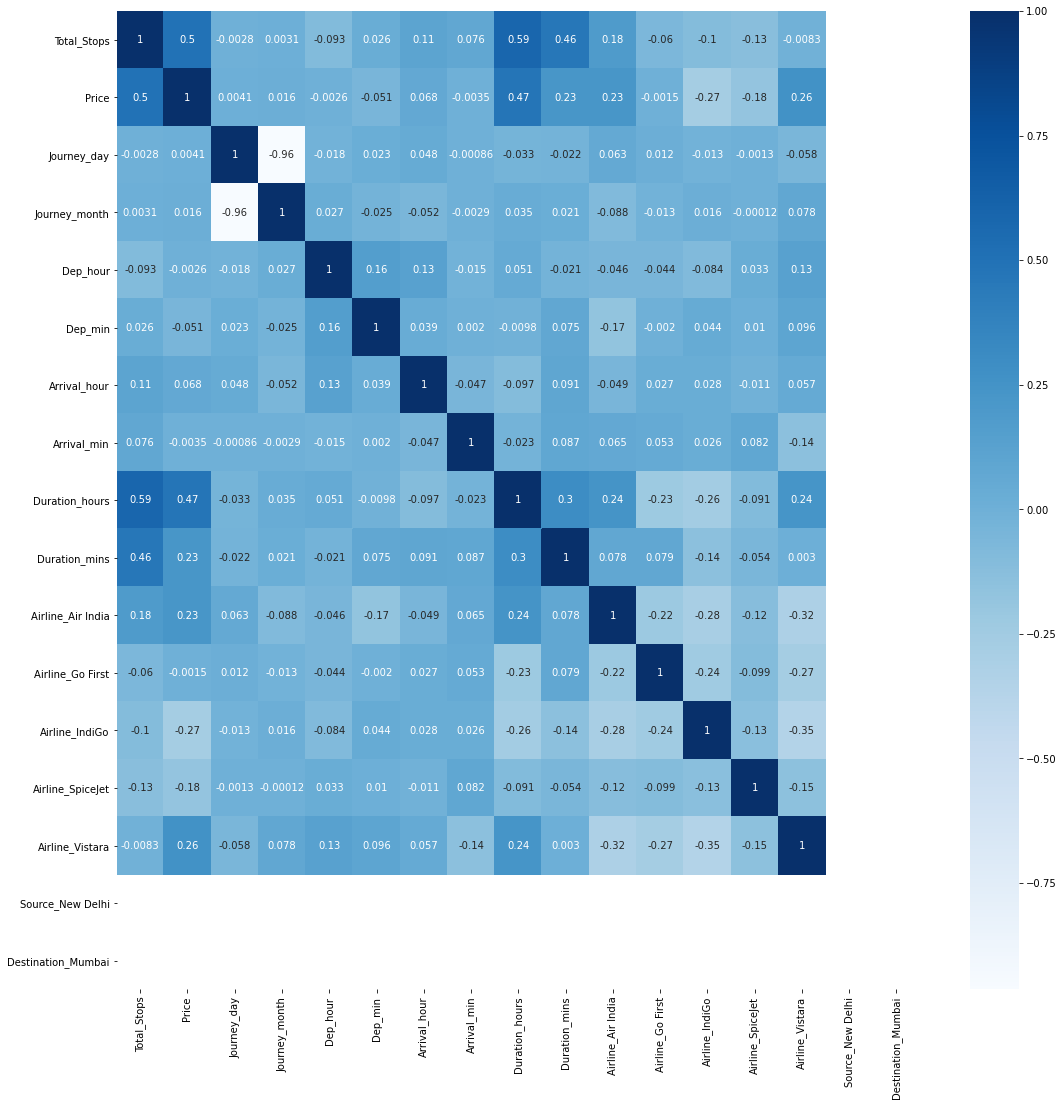

In [53]:
# correlation between Independent and dependent values.
plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, cmap = "Blues")
plt.show()

# Model Building

Split dataset into train and test set in order to prediction w.r.t X_test.

If needed do scaling of data

Scaling is not done in Random forest

Import model

Fit the data

Predict w.r.t X_test

In regression check RSME Score

Plot graph

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import statsmodels.api as sm
# for model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# for suppressing warnings
import warnings
warnings.filterwarnings("ignore")

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [61]:
lr=LinearRegression(normalize=True)
lr.fit(x_train,y_train)

LinearRegression(normalize=True)

In [62]:
lr_pred=lr.predict(x_test)

In [63]:
lr_pred

array([ 6976.49243002, 10967.15900427, 11588.70012789, 10375.88657698,
       11320.61361189, 11266.61116216,  7711.43645031,  7698.45233164,
       10900.74316998, 10874.07966392,  9683.83150692,  7236.70198069,
       12399.73026665,  5582.44985724, 10681.93754043,  9635.73987587,
        8141.59814846, 11694.28404857,  8139.98066848, 10926.7242701 ,
        5327.6013816 ,  9819.54125536,  7197.45834198,  6609.28808527,
        7038.24307457, 10759.97544663,  7434.05206278, 10737.79988674,
        9906.80338195, 10405.12827813,  9944.03490583, 10687.96224065,
       10816.95989504,  5439.25337753, 11558.09363678,  7426.50509472,
        9627.39487263, 11411.6051887 ,  9388.64783537,  9810.1111007 ,
        8003.16314959, 10496.95401777,  9969.94507053,  9956.19860859,
        6347.08805785, 11250.90466388,  4660.76771877,  6831.78833277,
        9848.84731914,  5503.28984894,  5248.14785128,  6396.20325349,
        8017.7027761 ,  8820.18233053,  7133.18531492, 11378.00900549,
      

In [64]:
lr_accuracy=round(lr.score(x_train,y_train)*100)
lr_accuracy

45

In [65]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, lr_pred)

1731.5628951197891

In [66]:
print("RMSE VALUE = ",mean_squared_error(y_test, lr_pred,squared = False))

RMSE VALUE =  2322.357397767956


In [67]:
import numpy as np
o = np.array(y_test)

In [68]:
print("original price  is " ,o[0])
print("predicted average price is " , lr_pred[0])

original price  is  8790.0
predicted average price is  6976.492430015496


In [69]:
# using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

In [70]:
print(selection.feature_importances_)

[0.14669301 0.17612667 0.01125646 0.05264706 0.05269594 0.05109109
 0.05468115 0.18345271 0.04109709 0.07069727 0.05120588 0.03569956
 0.00536988 0.06728622 0.         0.        ]


# XGBRegressor

In [102]:
from xgboost import XGBRegressor
model =  XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [104]:
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [105]:
y_pred =  model.predict(x_test)
print('Training Score :',model.score(x_train, y_train))
print('Test Score     :',model.score(x_test, y_test))

Training Score : 0.9951869440807274
Test Score     : 0.6992801591514202


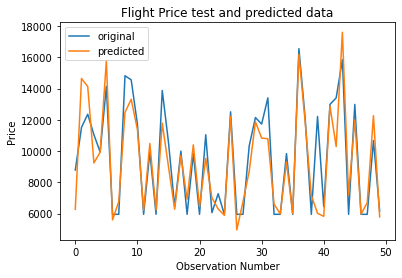

In [106]:
number_of_observations=50

x_ax = range(len(y_test[:number_of_observations]))

plt.plot(x_ax, y_test[:number_of_observations], label="original")

plt.plot(x_ax, y_pred[:number_of_observations], label="predicted")

plt.title("Flight Price test and predicted data")

plt.xlabel('Observation Number')

plt.ylabel('Price')

plt.legend()

plt.show()

As we can observe in the above figure, model predictions and original prices are overlapping. This visual result confirms the high model score .

# Data Visualisation

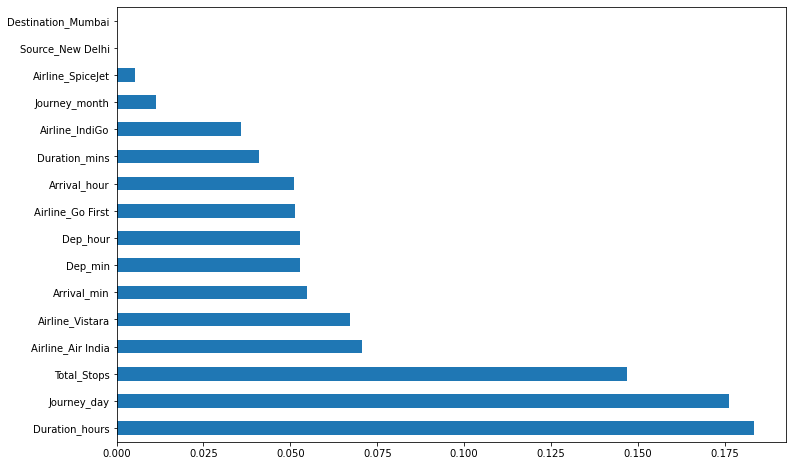

In [71]:
# visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Random Forest Regressor

In [72]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [73]:
y_pred = reg_rf.predict(x_test)

In [74]:
reg_rf.score(x_train, y_train)

0.9602759554159974

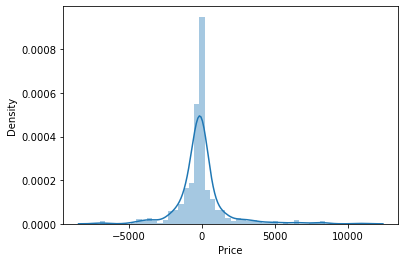

In [75]:
sns.distplot(y_test-y_pred)
plt.show()

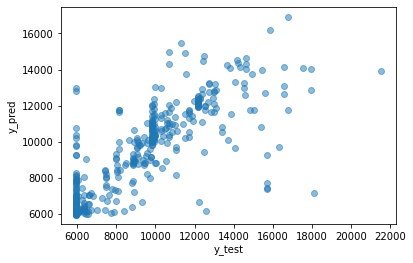

In [76]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [77]:
from sklearn import metrics

In [78]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 900.6289485596708
MSE: 2814006.511665362
RMSE: 1677.5000779926545


In [79]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

0.13285148068124047

In [80]:
metrics.r2_score(y_test, y_pred)

0.695068454536358

# KNeighborsRegressor,SVR,DecisionTreeRegressor,RandomForestRegressor

In [96]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#for RMSLE we will create  own scorer
from sklearn.metrics import make_scorer

In [97]:
def score(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred-y)**2))/len(y))**1/2    # 1-RMSLE

# make  own scorer
scorer = make_scorer(score,greater_is_better=True, needs_proba=False)

In [98]:
knn_reg = KNeighborsRegressor()
svm_reg = SVR(gamma='scale')
dt_reg = DecisionTreeRegressor()
rf_reg = RandomForestRegressor()

In [100]:
#Training,Testing
for reg in (knn_reg, svm_reg, dt_reg, rf_reg):
    reg.fit(x_train, y_train)
    
    y_pred = reg.predict(x_test)
    
    print(reg, score(y_pred,y_test))

KNeighborsRegressor() 0.9680692208598336
SVR() 0.9452027111266905
DecisionTreeRegressor() 0.9797783487389925
RandomForestRegressor() 0.9858572125190296


# Hyperparameter Tuning

Choose following method for hyperparameter tuning.

RandomizedSearchCV 

GridSearchCV

Assign hyperparameters in form of dictionary

Fit the model

Check best paramters and best score

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [82]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [83]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [84]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.3s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   4.0s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [85]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [86]:
prediction = rf_random.predict(x_test)

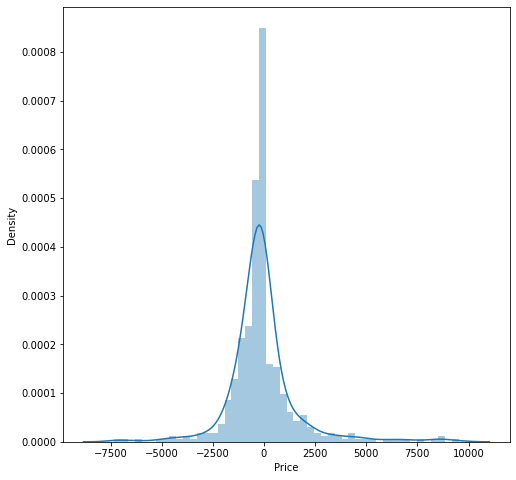

In [87]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

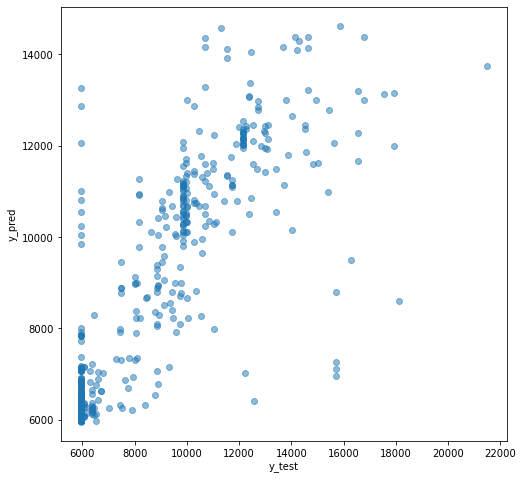

In [88]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [89]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 986.733917016496
MSE: 2984014.8190009743
RMSE: 1727.4301198604169


# Conclusion

In [90]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [91]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [92]:
y_prediction = forest.predict(x_test)

In [93]:
metrics.r2_score(y_test, y_prediction)

0.6766460039547402

In [94]:
conclusion=pd.DataFrame([forest.predict(x_test)

[:],prediction[:]],index=["Predicted","Orginal"])

In [95]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,476,477,478,479,480,481,482,483,484,485
Predicted,6539.762251,14113.64398,13069.621206,10943.350186,10337.219189,14385.677161,6232.440162,6445.805732,11588.027996,11861.24868,...,12654.190349,6114.516423,5959.310652,6151.948201,12006.300599,6169.531888,10813.589768,6742.997479,8396.551197,12192.564811
Orginal,6539.762251,14113.64398,13069.621206,10943.350186,10337.219189,14385.677161,6232.440162,6445.805732,11588.027996,11861.24868,...,12654.190349,6114.516423,5959.310652,6151.948201,12006.300599,6169.531888,10813.589768,6742.997479,8396.551197,12192.564811
